- ### Documents used : 
    - https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html
    - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    - 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np

from ML_loader import DatasetLoader,ModelLoader

In [2]:
#Get data 
loader = DatasetLoader()
loader.read_dataset('partial_database.csv',class_path='labelsDefault.txt',separator=',')
loader.split_dataset()

#Normalize data, if not already normalized
print(np.shape(loader.X_train),np.shape(loader.X_test),np.shape(loader.y_train),np.shape(loader.y_test))

(4048, 17) (1012, 17) (4048,) (1012,)


In [3]:
#Get model
model = ModelLoader()
model.set_model(PassiveAggressiveClassifier())

cv = RepeatedStratifiedKFold(n_splits=22, n_repeats=3, random_state=1)

#Optimization 
param={'C': [0.1, 1, 10, 100, 1000],
       'tol': [1e-3, 1e-4, 1e-5],
         'loss': ['hinge', 'squared_hinge'],
            'fit_intercept': [True, False],
            'shuffle': [True, False],
            'class_weight': ['balanced', None],
            'average': [True, False],
}
model.set_optimal_params(param)

model.optimize(loader.X_train,loader.y_train,cv=cv,scoring='accuracy',n_iter=10)

#Train model with optimal params
model.set_model(PassiveAggressiveClassifier(**model.optimal_params))

Score accuracy group:  0.8819875776397516
Score accuracy global:  0.28063241106719367
Memory:  162.34609375 MB
Score accuracy group:  0.021739130434782608
Score accuracy global:  0.28063241106719367
Memory:  188.54921875 MB
Score accuracy group:  0.40217391304347827
Score accuracy global:  0.274703557312253
Memory:  194.57421875 MB
Score accuracy group:  0.10144927536231885
Score accuracy global:  0.3300395256916996
Memory:  200.40859375 MB
Score accuracy group:  0.021739130434782608
Score accuracy global:  0.33695652173913043
Memory:  206.3197244623656 MB
Score accuracy group:  0.0
Score accuracy global:  0.34782608695652173
Memory:  212.28535091362127 MB
Score accuracy group:  0.18115942028985507
Score accuracy global:  0.33300395256917
Memory:  218.36640625 MB
Average memory usage:  197.5499438037124 MB


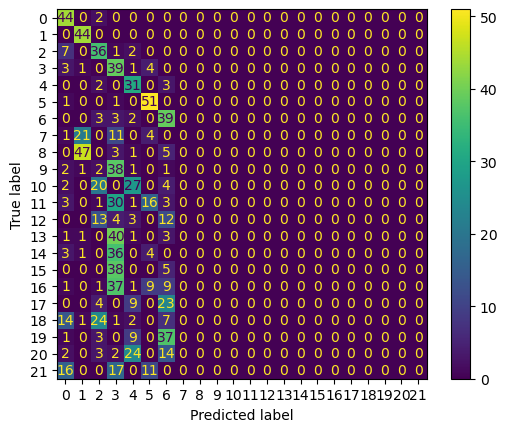

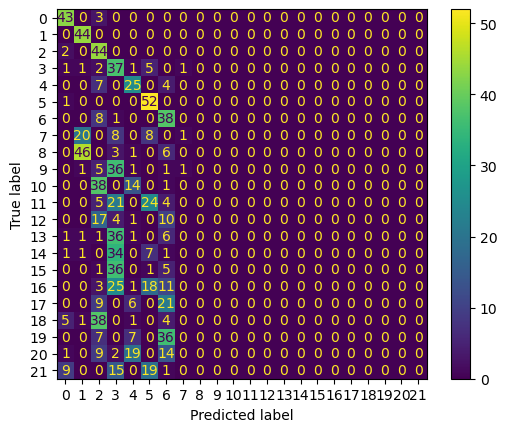

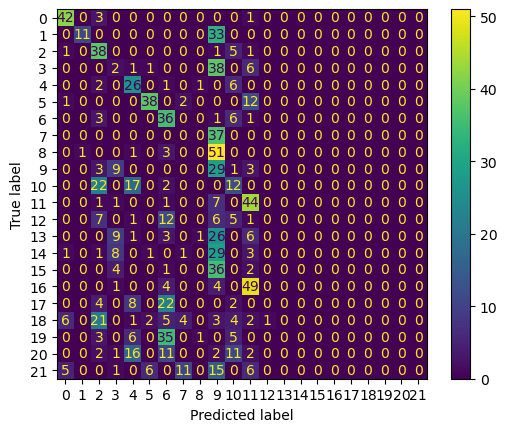

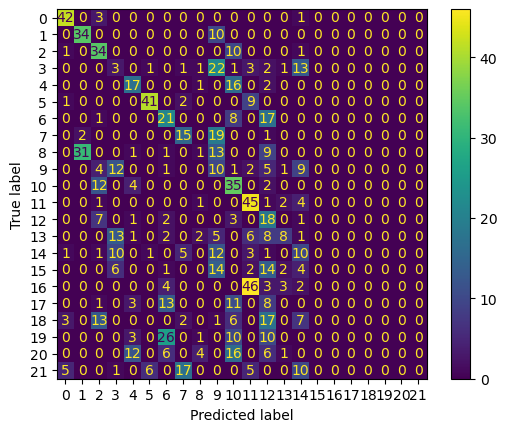

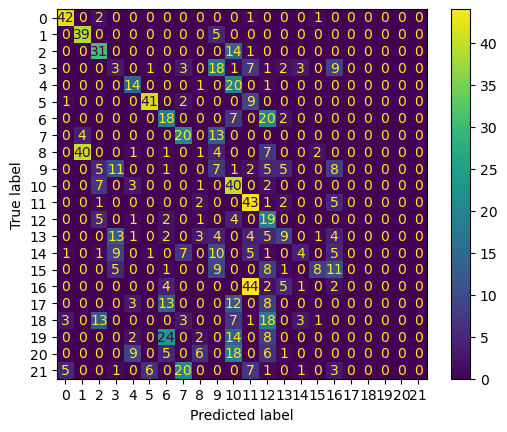

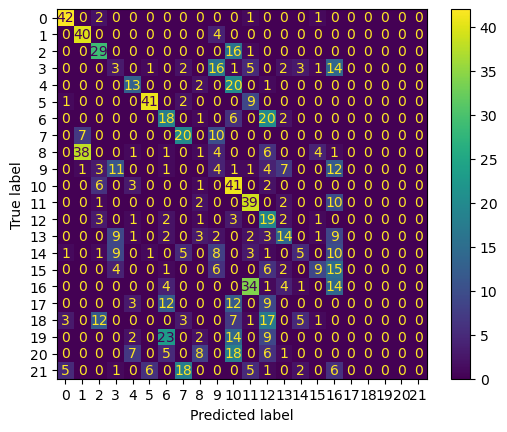

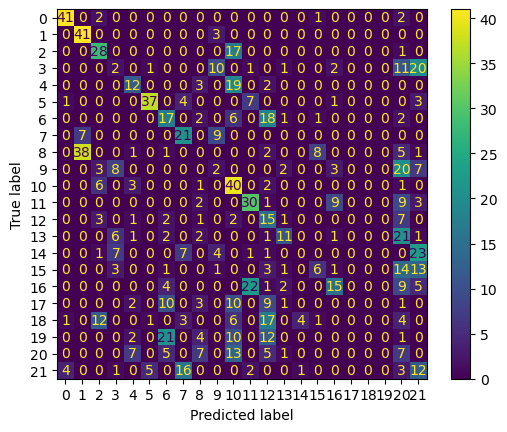

In [4]:
##Split by class, to increment by class:
class_to_group = {1:[1,2,3,4,5,6,7],2:[8,9],3:[10,11,12,13],4:[14,15,16],5:[17,18],6:[19],7:[20,21,22]}
X_train_merged, X_test_merged, y_train_merged, y_test_merged=loader.split_dataset_class(class_to_group)
memory_values = []

#Train model
for X_train,y_train,X_test,y_test in (zip(X_train_merged,y_train_merged,X_test_merged,y_test_merged)):
    mem,res=model.partial_fit_train(X_train,y_train,classes=loader.classes)
    
    print("Score accuracy group: ",model.score(X_test,y_test))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))
    
    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")

Score accuracy batch:  0.46047430830039526
Score accuracy global:  0.37450592885375494
Memory:  244.47109375 MB
Score accuracy batch:  0.4624505928853755
Score accuracy global:  0.3942687747035573
Memory:  249.4921875 MB
Score accuracy batch:  0.43873517786561267
Score accuracy global:  0.3952569169960474
Memory:  255.40234375 MB
Score accuracy batch:  0.4031620553359684
Score accuracy global:  0.3893280632411067
Memory:  261.3984375 MB
Score accuracy batch:  0.3893280632411067
Score accuracy global:  0.3794466403162055
Memory:  246.28125 MB
Score accuracy batch:  0.35375494071146246
Score accuracy global:  0.37648221343873517
Memory:  248.44921875 MB
Score accuracy batch:  0.37351778656126483
Score accuracy global:  0.3774703557312253
Memory:  249.62890625 MB
Score accuracy batch:  0.308300395256917
Score accuracy global:  0.37450592885375494
Memory:  251.17578125 MB
Score accuracy batch:  0.2766798418972332
Score accuracy global:  0.3695652173913043
Memory:  252.71744791666666 MB
Sco

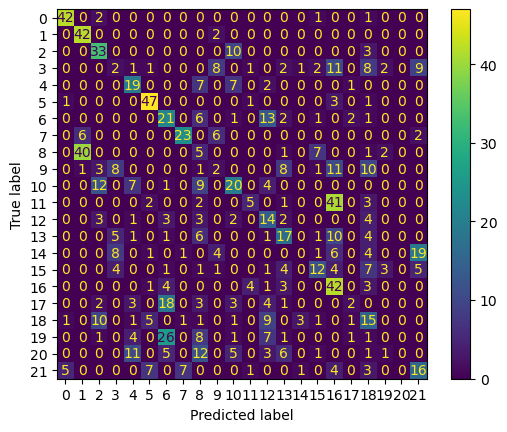

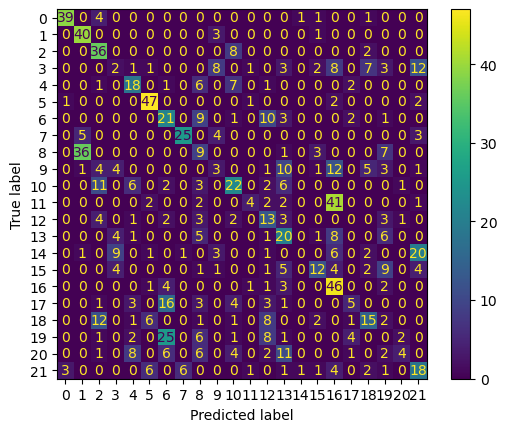

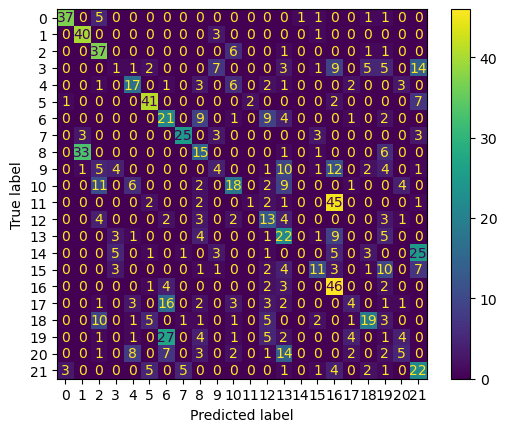

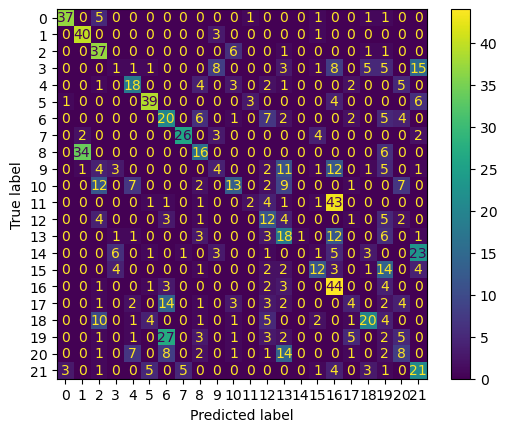

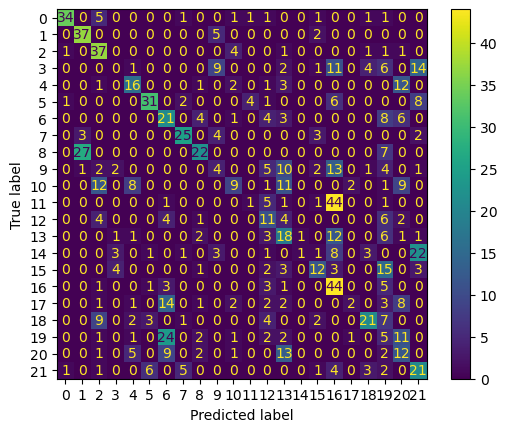

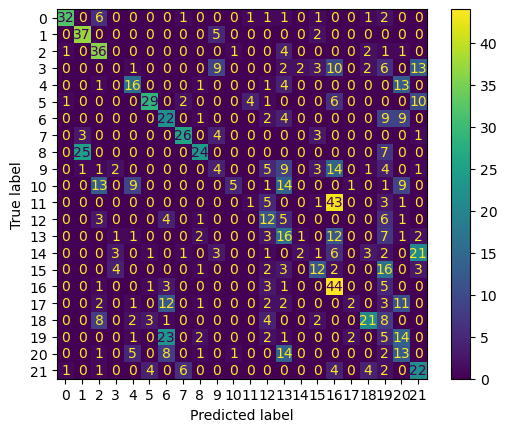

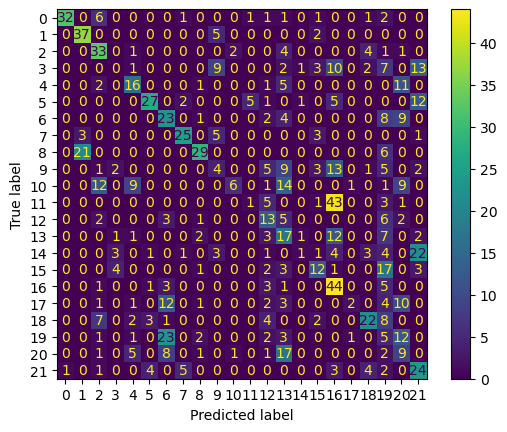

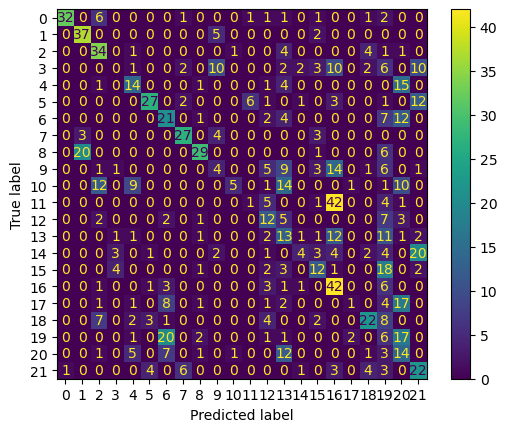

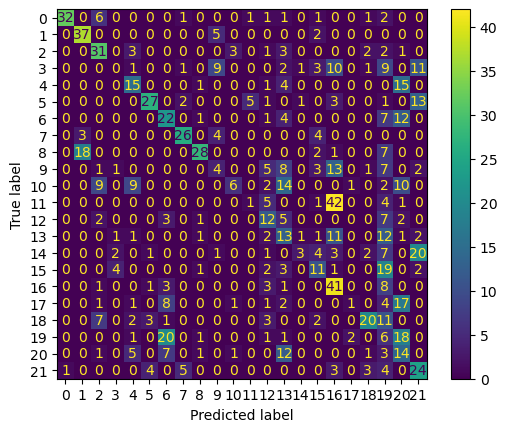

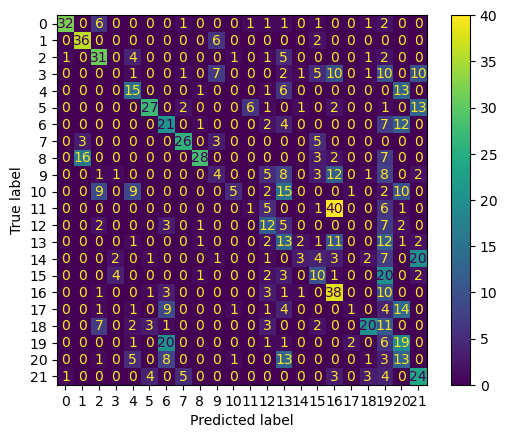

In [5]:
X_train_split_data,y_train_split_data,X_test_split_data,y_test_split_data=loader.split_dataset_data(10)
memory_values = []

for x in range(len(X_train_split_data)):
    mem,res=model.partial_fit_train(X_train_split_data[x],y_train_split_data[x],classes=loader.classes)
    print("Score accuracy batch: ",model.score(X_test_split_data[x],y_test_split_data[x]))
    print("Score accuracy global: ",model.score(loader.X_test,loader.y_test))
    print("Memory: ",np.mean(mem),"MB")
    memory_values.append(np.mean(mem))

    y_pred=model.predict(loader.X_test)
    cm = confusion_matrix(loader.y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()

model.reset_model()

average_memory = np.mean(memory_values)
print("Average memory usage: ", average_memory,"MB")